<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework2Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the diabetes dataset
df = pd.read_csv('https://raw.githubusercontent.com/sparab2/MachineLearning/main/diabetes.csv')

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [ ]:
class LogisticRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        # Initializing the weights and the bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent algorithm
        for i in range(self.max_iter):
            # Calculate the linear combination of weights and features
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply the sigmoid function to get the predicted probabilities
            y_pred = self.sigmoid(linear_model)
            
            # Compute the gradient of the loss function with respect to the weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def predict(self, X):
        # Calculate the linear combination of weights and features
        linear_model = np.dot(X, self.weights) + self.bias
        
        # Apply the sigmoid function to get the predicted probabilities
        y_pred = self.sigmoid(linear_model)
        
        # Convert the probabilities to binary predictions
        y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
        
        return y_pred_binary

In [ ]:
# Scale and standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train a logistic regression model on the training data
model = LogisticRegressionGradientDescent(learning_rate=0.01, max_iter=100)
model.fit(X_train, y_train)

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n{cm}')


Accuracy: 0.7077922077922078
Precision: 0.5833333333333334
Recall: 0.6363636363636364
Confusion Matrix:
[[74 25]
 [20 35]]


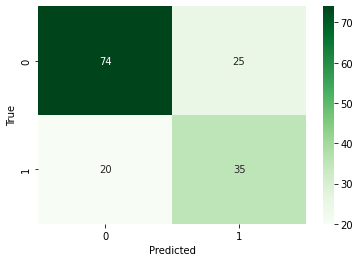

In [ ]:
# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()